# Практическая работа №1: Основы анализа и моделирования социальных сетей

Выполнил студент гр. 0383 Бояркин Никита. Вариант №3

## Цель работы
Овладеть навыками работы с математическими пакетами для моделирования, визуализации и анализа социальных сетей.

## Основные теоретические положения
## Основные теоретические положения
**Социоматрица** -- матрица $X$ размерности $g \times g$, описывающая смежные узлы в сети.

**Алгоритм Фрюхтермана-Рейнгольда** -- силовой алгоритм укладки графа (т. е. итеративный алгоритм, основанный на уменьшении общей энергии сети, где энергия может быть определена различными способами), в котором вершины определяются как некие тела, оказывающие друг на друга силы притяжения и отталкивания.

**Алгоритм Камада-Кавай** -- силовой алгоритм укладки графа, в котором вершины определяются как тела системы, а рёбра -- как пружины. Пружинная система настраивается таким образом, чтобы минимизация энергии системы соответствовала минимизации разницы между геометрическими и графовыми расстояниями.

**Размер сети** -- количество акторов сети.

**Плотность сети** -- доля имеющихся связей по отношению к макисмально возможному количеству связей.

Для ориентированных сетей: $\Delta = \displaystyle{\frac{L}{A_g^2}}$

Для неориентированных сетей: $\Delta = \displaystyle{\frac{L}{C^2_g}}$

**Компонента** -- подгруппа, в котором все акторы связаны друг с другом прямо или косвенно.

**Диаметр полной сети** -- наибольшая длина любого из кратчайших путей между всеми парами узлов.

**Коэффициент кластеризации** --  мера степени, в которой узлы графа стремятся сгруппироваться вместе.

**Степень узла** -- число рёбер, инцидентных узлу $n_i$.

Средняя степень узлов: $\overline{d} = \displaystyle{\frac{1}{g}} \sum^g_{i = 1} d(n_i)$

Дисперсия степени узлов: $S^2_D = \displaystyle{\frac{1}{g}} \sum^g_{i = 1} \left(d(n_i) - \overline{d}\right)^2$

**Центральность по степени** -- степень каждого актора.

Нормированная центральность по степени: $C'_D (n_i) = \displaystyle{\frac{d(n_i)}{g-1}}$

**Центральность по близости** -- более важными узлами считаются узлы, наиболее близкие к остальным узлам сети.

Нормированная центральность по близости: $C'_C (n_i) = \displaystyle{\frac{g - 1}{\sum^g_{j = 1} d(n_i, n_j)}}$

**Центральность по последовательности** -- характеризует, насколько важную роль данный узел играет на пути "между" парами других узлов сети, в том смысле, что пути между другими узлами должны проходить через данный узел.

Нормированная центральность по посредничеству: $C'_B = \displaystyle{\frac{C_b (n_i)}{C_{g-1}^2}}$

**Центральность по информации** -- обобщение понятия центральности по посредничеству, в котором все пути, между акторами с весами зависят от их длин, учитываются при подсчёте промежуточности.

**Централизация по степени:** $C_D = \displaystyle{\frac{\sum_{i = 1}^g (C'_D (n^*) - C'_D (n_i))}{(g-1)(g-2)}}$

**Централизация по близости**: $C_C = \displaystyle{\frac{\sum_{i = 1}^g (C'_C (n^*) - C'_C (n_i))}{(g-1)(g-2)/(2g - 3)}}$

**Централизация по посредничеству**: $C_B = \displaystyle{\frac{\sum_{i = 1}^g (C'_B (n^*) - C'_B (n_i))}{(g-1)}}$

**Централизация по информации** как дисперсия индексов инф. актора: $S_I^2 = \displaystyle{\frac{1}{g}} \sum^g_{i = 1} \left( C'_I (n_i) - \overline{C_I} \right) ^2$

**Точка сочленения** -- узел, при удалении которого увеличивается число компонент связности.

**Мост** -- ребро, при удалении которого одна компонента разделяется на две.

**Престиж** -- мера, характеризующая актора с большим количеством входящих связей.

**Престиж по степени** -- входящая степень каждого узла: $P_D (n_i) = d_I (n_i) = x_{+i}$

Нормированный престиж по степени: $P'_D (n_i) = \displaystyle{\frac{x_{+i}}{g - 1}}$

**Престиж по близости** -- определяет, насколько все акторы близки к заданному по расстоянию до него.

$P_p (n_i) = \displaystyle{\frac{\# I_i / (g-1)}{\sum_{j: n_j \in I_i} \left( d(n_j, n_i) / \# I_i\right)}}$

## Постановка задачи
С помощью математических пакетов и соответствующих библиотек провести анализ заданных социальных сетей вычислить описательные характеристики. Полученные результаты содержательно проинтерпретировать.

## Выполнение работы
Подключаем библиотеки igraph, network, sna и intergraph.

In [1]:
if(!require('igraph')) {
        install.packages('igraph')
        library('igraph')
        
    }
if(!require('network')){
        install.packages('network')
        library('network')
}
if(!require('sna')){
        install.packages('sna')
        library('sna')
}
if(!require('intergraph')){
        install.packages('intergraph')
        library('intergraph')
}

Loading required package: igraph

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘igraph’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘igraph’


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union


Loading required package: network

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘network’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘coda’, ‘statnet.common’



‘network’ 1.18.0 (2022-10-05), part of the Statnet Project
* ‘news(package="network")’ for changes since last version
* ‘citation("network")’ for citation information
* ‘https://statnet.org’ for help, support, and other information



Attachin

1. Из файла florentine_business.csv извлекаем социоматрицу с помощью соответствующих функций. Выводим полученную социоматрицу на экран.

In [2]:
florentine_business <- read.table("./florentine_business.csv", header = TRUE, sep=',')

In [3]:
florentine_business

Acciaiuoli,Albizzi,Barbadori,Bischeri,Castellani,Ginori,Guadagni,Lamberteschi,Medici,Pazzi,Peruzzi,Pucci,Ridolfi,Salviati,Strozzi,Tornabuoni
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,0,0,0,1,1,0,0,1,0,1,0,0,0,0,0
0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0
0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0
0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
0,0,0,1,1,0,1,0,0,0,1,0,0,0,0,0
0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1


2. Преобразуем социоматрицу в список рёбер. Выведем первые 5 элементов списка рёбер.


In [4]:
edgelist <- as_edgelist(graph.adjacency(as.matrix(florentine_business), mode = "undirected"))
head(edgelist, 5)

Barbadori,Castellani
Barbadori,Ginori
Barbadori,Medici
Barbadori,Peruzzi
Bischeri,Guadagni


3. Присвоим имена столбцам и строкам социоматрицы (имена – первая строка в csv-файле после комментариев).

In [5]:
rownames(florentine_business) <- colnames(florentine_business)
florentine_business

,Acciaiuoli,Albizzi,Barbadori,Bischeri,Castellani,Ginori,Guadagni,Lamberteschi,Medici,Pazzi,Peruzzi,Pucci,Ridolfi,Salviati,Strozzi,Tornabuoni
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
Acciaiuoli,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Albizzi,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Barbadori,0,0,0,0,1,1,0,0,1,0,1,0,0,0,0,0
Bischeri,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0
Castellani,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0
Ginori,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
Guadagni,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
Lamberteschi,0,0,0,1,1,0,1,0,0,0,1,0,0,0,0,0
Medici,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1


4. С помощью соответствующих функций по полученной социоматрице построим ненаправленную сеть. 

  Параметры, передаваемые в функцию *graph_from_adjacency_matrix*:
  1. социоматрица, тип объекта - матрица
  2. режим: ненаправленная сеть

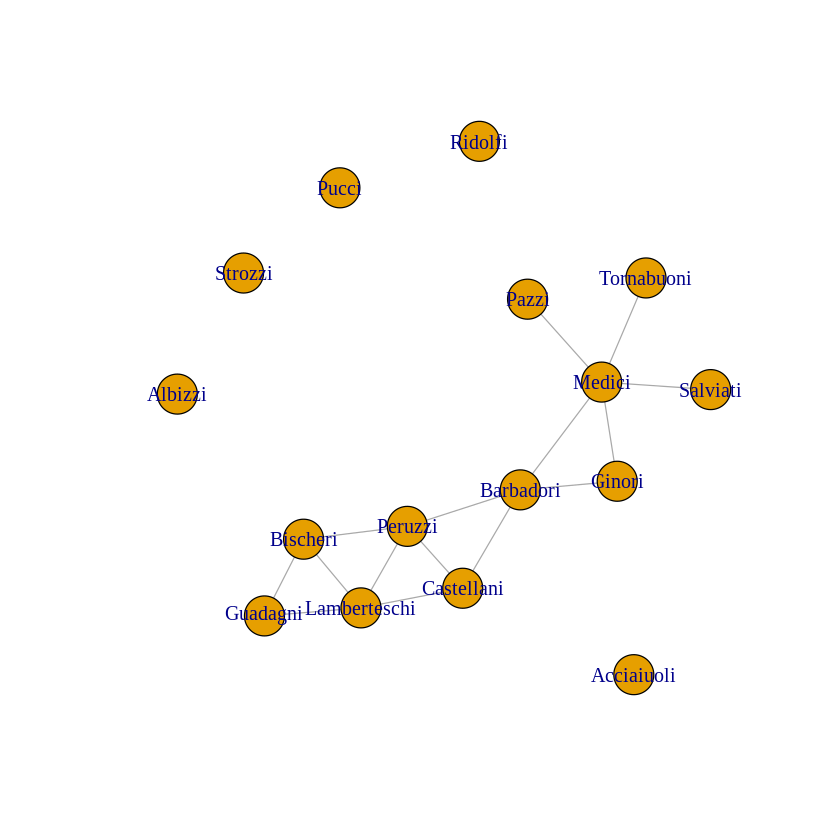

In [6]:
net_florentine_business <- graph_from_adjacency_matrix(as.matrix(florentine_business), mode = "undirected")
plot(net_florentine_business)

5. Отобразим сеть с помощью алгоритмов укладки Фрюхтермана–
Рейнгольда и Камада–Каваи.

   Алгоритм Фрюхтермана–Рейнгольда рассчитывает силы притяжения и отталкивания каждой вершины графа, и руководствуется только ими.

   Алгоритм Камада-Каваи на каждом шаге отталкивается от вершины, на которую действует наибольшая сила, и минимизирует энергию относительно неё.

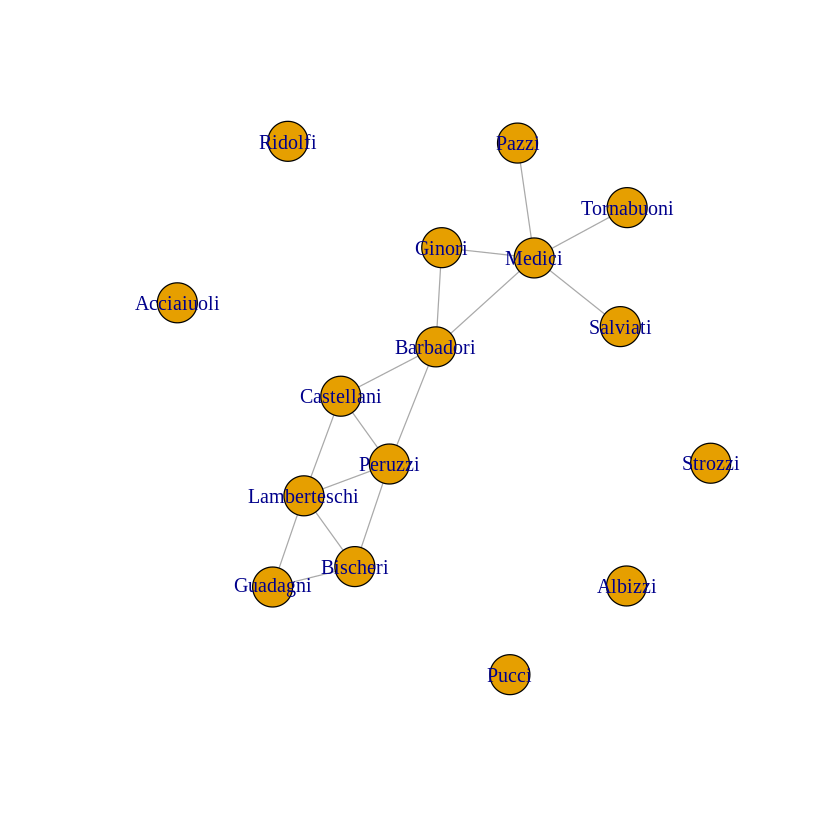

In [7]:
# Алгоритм Фрюхтермана–Рейнгольда
plot(net_florentine_business, layout=layout_with_fr(net_florentine_business)) 

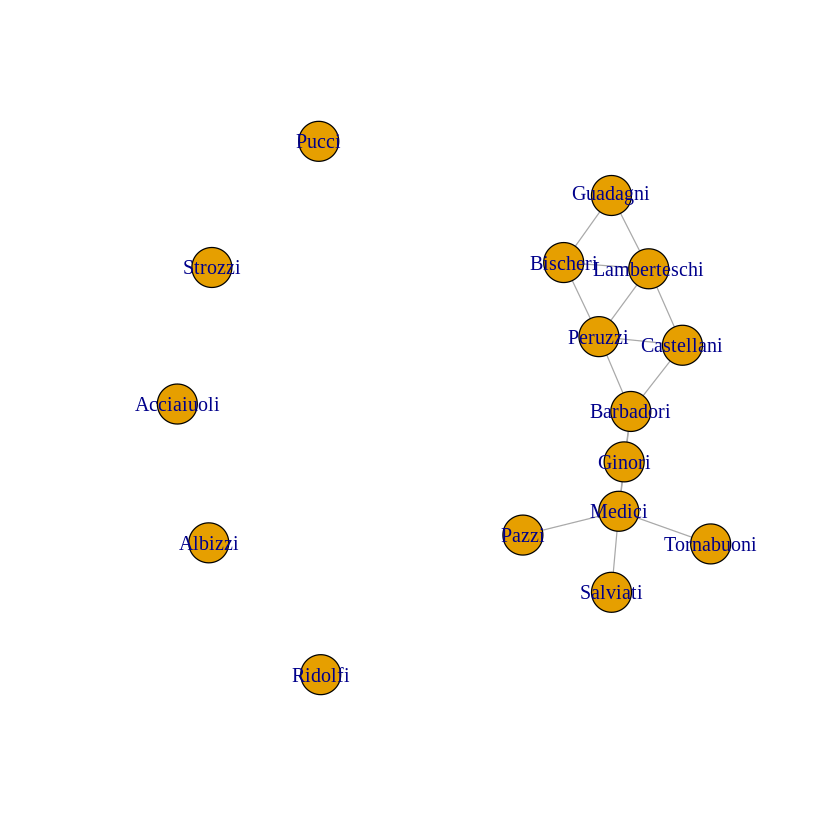

In [8]:
# Алгоритм Камада-Каваи
plot(net_florentine_business, layout = layout_with_kk(net_florentine_business))

6. Выведем «описательную сводку» сети.

In [59]:
summary(as.network(x = as.matrix(florentine_business), directed = F, loops = T, matrix.type = "adjacency"))

Network attributes:
  vertices = 16
  directed = FALSE
  hyper = FALSE
  loops = TRUE
  multiple = FALSE
  bipartite = FALSE
 total edges = 15 
   missing edges = 0 
   non-missing edges = 15 
 density = 0.1102941 

Vertex attributes:
  vertex.names:
   character valued attribute
   16 valid vertex names

No edge attributes

Network edgelist matrix:
      [,1] [,2]
 [1,]    5    3
 [2,]    6    3
 [3,]    9    3
 [4,]   11    3
 [5,]    7    4
 [6,]    8    4
 [7,]   11    4
 [8,]    8    5
 [9,]   11    5
[10,]    9    6
[11,]    8    7
[12,]   11    8
[13,]   10    9
[14,]   14    9
[15,]   16    9

In [9]:
sum.network(net_florentine_business)

IGRAPH 75985d3 UN-- 16 15 -- 
+ attr: name (v/c)
+ edges from 75985d3 (vertex names):
 [1] Barbadori   --Castellani   Barbadori   --Ginori      
 [3] Barbadori   --Medici       Barbadori   --Peruzzi     
 [5] Bischeri    --Guadagni     Bischeri    --Lamberteschi
 [7] Bischeri    --Peruzzi      Castellani  --Lamberteschi
 [9] Castellani  --Peruzzi      Ginori      --Medici      
[11] Guadagni    --Lamberteschi Lamberteschi--Peruzzi     
[13] Medici      --Pazzi        Medici      --Salviati    
[15] Medici      --Tornabuoni  

In [10]:
str(net_florentine_business)

Class 'igraph'  hidden list of 10
 $ : num 16
 $ : logi FALSE
 $ : num [1:15] 4 5 8 10 6 7 10 7 10 8 ...
 $ : num [1:15] 2 2 2 2 3 3 3 4 4 5 ...
 $ : num [1:15] 0 1 4 5 7 10 2 9 12 3 ...
 $ : num [1:15] 0 1 2 3 4 5 6 7 8 9 ...
 $ : num [1:17] 0 0 0 0 0 1 2 3 6 8 ...
 $ : num [1:17] 0 0 0 4 7 9 10 11 12 15 ...
 $ :List of 4
  ..$ : num [1:3] 1 0 1
  ..$ : Named list()
  ..$ :List of 1
  .. ..$ name: chr [1:16] "Acciaiuoli" "Albizzi" "Barbadori" "Bischeri" ...
  ..$ : list()
 $ :<environment: 0x563947102c48> 


7. Необходимо вычислить «пятичисловую сводку» сети:
  1.   Вычислить размер сети.
  2.   Вычислить плотность сети вручную и с помощью соответствующей функции. Сделать выводы.
  3.   Определить число компонент в сети по графику. Подтвердить
свои догадки с помощью соответствующей функции. Сделать
выводы.
  4.   Вычислить диаметр сети. Сделать выводы
  5.   Вычислить коэффициент кластеризации. Сделать выводы.

Размер сети:

In [11]:
vcount(net_florentine_business)

[1] 16

Плотность сети с помощью *graph.density*:

In [12]:
graph.density(net_florentine_business)

[1] 0.125

Плотность сети вручную:

In [13]:
ecount(net_florentine_business)/(factorial(vcount(net_florentine_business))/(factorial(vcount(net_florentine_business) - 2) * factorial(2)))

[1] 0.125

Кол-во компонент:

In [14]:
count_components(net_florentine_business)

[1] 6

Диаметр:

In [15]:
diameter(net_florentine_business)

[1] 5

Коэффициент кластеризации:

In [16]:
transitivity(net_florentine_business, type = "undirected") 

[1] 0.4166667

Выводы:

  1. Всего в сети 16 семейств.
    
  2. Доля связей между семьями, т.е. плотность:  0.125 (значения посчитанные вручную и с помощью ф-ии совпали)

  3. Есть только 6 компонент.
    
  4. Самый длинный из кратчайших путей связи между семьями равен 5.
    
  5. Доля триад в сети: 0.416666666666667 

8. Вычислить среднюю степень узлов и дисперсию. Сделать выводы.

Средняя степень узлов:

In [17]:
mean(igraph::degree(net_florentine_business))

[1] 1.875

Дисперсия:

In [18]:
var(igraph::degree(net_florentine_business))

[1] 3.05

Вывод: В среднем каждое из семейств имеет 1-2 связи с другими семьями с дисперсией, равной 3.05.

9.
Заполнить таблицу для различных мер центральности. *Примечание: меры центральности вычислить для неизолированных вершин*:

<div align="center">

| $n_i$ 	| $C^{'}_{D}(n_i)$ 	| $C^{'}_{C}(n_i)$ 	| $C^{'}_{B}(n_i)$ 	| $C^{'}_{I}(n_i)$ 	|
|---	|---	|---	|---	|---	|
|  	|  	|  	|  	|  	|


</div>
Сделать выводы.

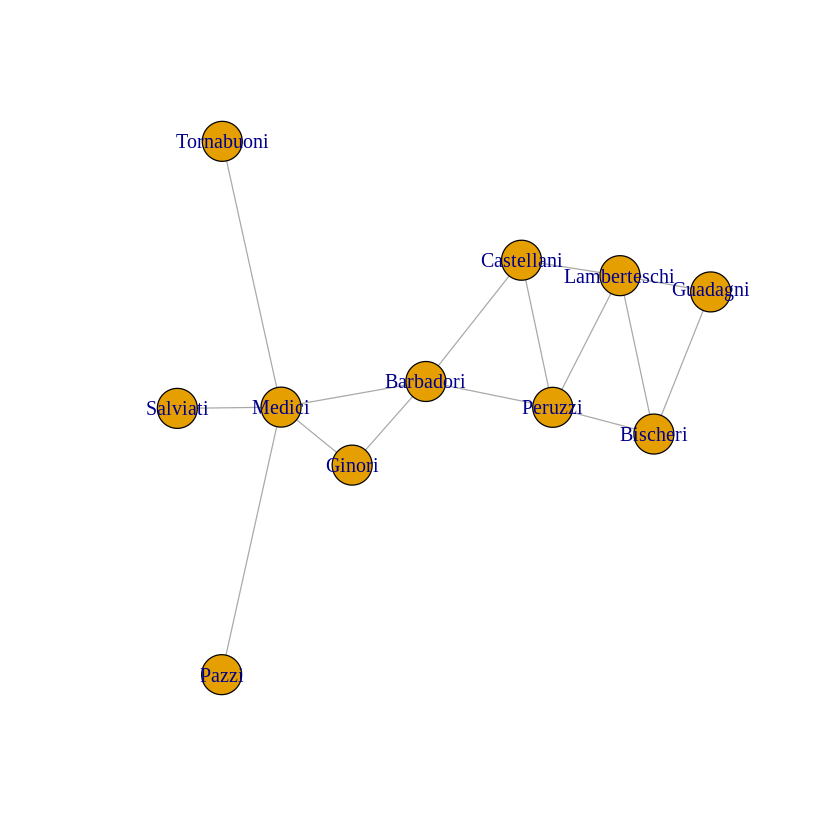

In [19]:
# Возьмём граф без изолированных вершин
net_without_isolated <- delete_vertices(net_florentine_business, which(igraph::degree(net_florentine_business)==0))
plot(net_without_isolated)

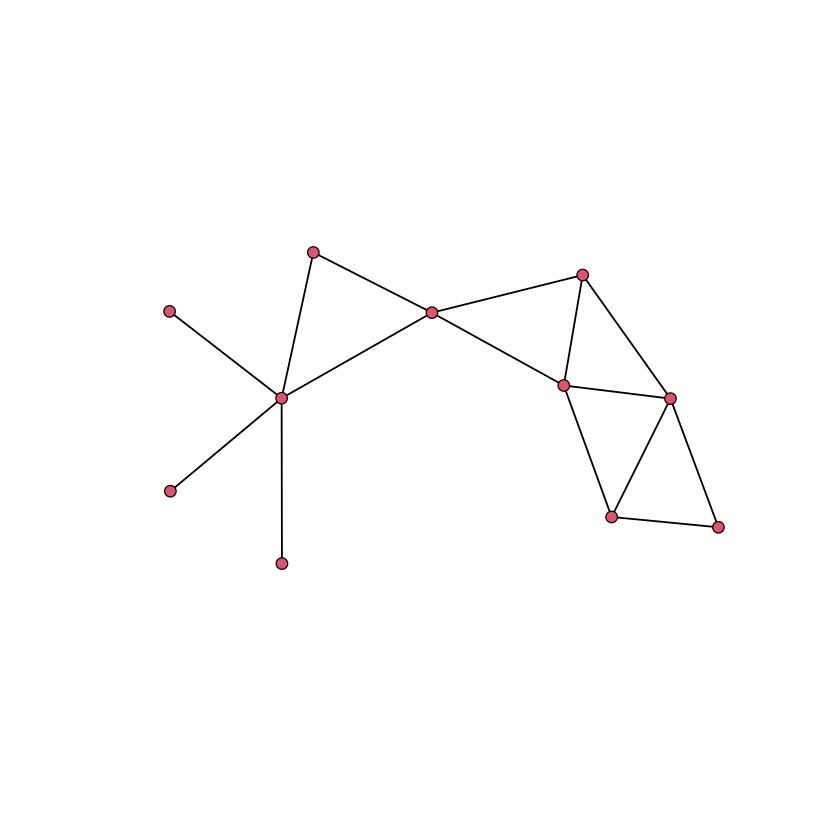

In [20]:
# возьмем сеть без изолированных вершин
network_without_isolated <- network(edgelist, matrix.type="edgelist", directed = F)
plot(network_without_isolated)

In [21]:
information_cent <- sna::infocent(network_without_isolated, gmode="digraph")
information_cent_norm <- information_cent / sum(information_cent)
information_cent_norm

[1] 0.12446815 0.08898359 0.10457651 0.09531249 0.07656303 0.09837087
 [7] 0.11089878 0.06388631 0.10916767 0.06388631 0.06388631

In [22]:
information_cent

[1] 1.0094549 0.7216700 0.8481308 0.7729983 0.6209374 0.7978022 0.8994054
 [8] 0.5181273 0.8853659 0.5181273 0.5181273

In [23]:
centr_degree_res <- centr_degree(net_without_isolated, normalized = TRUE)$res
centr_degree_res_norm <- centr_degree_res / (vcount(net_without_isolated) - 1)
centr_degree_res_norm

[1] 0.4 0.3 0.3 0.2 0.2 0.4 0.5 0.1 0.4 0.1 0.1

In [24]:
closeness_net <- igraph::closeness(net_without_isolated, normalized = T) 
print(closeness_net)

   Barbadori     Bischeri   Castellani       Ginori     Guadagni Lamberteschi 
   0.5882353    0.4000000    0.5000000    0.4545455    0.3125000    0.4166667 
      Medici        Pazzi      Peruzzi     Salviati   Tornabuoni 
   0.5263158    0.3571429    0.5263158    0.3571429    0.3571429 


In [25]:
betweenness_net <- igraph::betweenness(
  net_without_isolated,
  directed = FALSE,
  normalized = TRUE,
)
print(betweenness_net)

   Barbadori     Bischeri   Castellani       Ginori     Guadagni Lamberteschi 
  0.55555556   0.05555556   0.11111111   0.00000000   0.00000000   0.13333333 
      Medici        Pazzi      Peruzzi     Salviati   Tornabuoni 
  0.53333333   0.00000000   0.30000000   0.00000000   0.00000000 


In [26]:
centr_df <- data.frame(
    "degree_res_norm"=centr_degree_res_norm,
    "closeness_net"=closeness_net,
    "betweenness_net"=betweenness_net,
    "information_cent_norm"=information_cent_norm
)


centr_df

,degree_res_norm,closeness_net,betweenness_net,information_cent_norm
,<dbl>,<dbl>,<dbl>,<dbl>
Barbadori,0.4,0.5882353,0.55555556,0.12446815
Bischeri,0.3,0.4000000,0.05555556,0.08898359
Castellani,0.3,0.5000000,0.11111111,0.10457651
Ginori,0.2,0.4545455,0.00000000,0.09531249
Guadagni,0.2,0.3125000,0.00000000,0.07656303
Lamberteschi,0.4,0.4166667,0.13333333,0.09837087
Medici,0.5,0.5263158,0.53333333,0.11089878
Pazzi,0.1,0.3571429,0.00000000,0.06388631
Peruzzi,0.4,0.5263158,0.30000000,0.10916767


Как видно из таблицы, наибольшими значениями центральности обладает *Medici* и *Barbadori*, т. е. *Medici* и *Barbadori* является наиболее влиятельными актороми в сети. (Можно заметить, что наибольшими значениями центральности по информации являются *Barbadori* (0.12) и *Medici* (0.11))

Также из таблицы можно заметить, что наибольшими значениями центральности по степени являются *Medici* (0.5), *Barbadori* (0.4), *Lamberteschi* (0.4) и *Peruzzi* (0.4). Эти семьи являются наиболее популярными в сети.

Наибольшими значениями центральности по близости являются *Barbadori* (0.58), *Medici* (0.52) и *Peruzzi* (0.52). Это семьи, которые лучше всего могут влиять на всю сеть как можно быстрее.

Наибольшими значениями центральности по последовательности являются *Barbadori* (0.55) и *Medici* (0.53). Это семьи, которые больше всего влиют на поток в сети.

10. Вычислим значение централизации для каждой меры.

In [27]:
betw <- centr_betw(net_without_isolated, directed = FALSE, normalized = TRUE)$centralization
betw

[1] 0.4422222

In [28]:
clo <- centr_clo(net_without_isolated, normalized = TRUE)$centralization
clo

[1] 0.3535226

In [29]:
centralization_degree <- centr_degree(
  net_without_isolated,
  normalized = TRUE
)$centralization
centralization_degree

[1] 0.2272727

In [30]:
centrality_by_info <- sna::infocent(network_without_isolated, gmode='graph', rescale=TRUE) # rescale нормирует
centr_by_info <- sum(sapply(centrality_by_info, function(x) {(x-sum(centrality_by_info))^2})) / length(centrality_by_info)
centr_by_info

[1] 0.8268573

In [31]:
# centralization(network_without_isolated, sna::infocent)

In [32]:
centralization_df <- data.frame(
    "c_degree"=centralization_degree,
    "c_betweenness"=betw,
    "c_closeness"=clo,
    "c_information"=centr_by_info
)


centralization_df

c_degree,c_betweenness,c_closeness,c_information
<dbl>,<dbl>,<dbl>,<dbl>
0.2272727,0.4422222,0.3535226,0.8268573


11. Выявить точки сочленения и мосты сети. Подтвердить свои догадки с помощью соответствующих функций (если их нет – реализуйте
их самостоятельно). Построить график сети, на котором выделены
точки сочленения и мосты.


Выделить мосты и точки сочленения. Заметим, что удаление вершины *Medici* приведёт к возникновению четерех новых компонент связности. И при удалении рёбер от *Medici* до элементов *Tornabuoni* и *Pazzi*, *Salviati* также приведет к возникновению новых компонент связаности. Значит эти ребра будут являться мостами;

Также заметим, что при удалении вершины *Barbadori* приведет к новым двум компонентам связности. Значит это вершина также является точкой сочленения.

In [33]:
articulation_points <- igraph::articulation_points(net_florentine_business)
articulation_points

+ 2/16 vertices, named, from 75985d3:
[1] Medici    Barbadori

In [34]:
graph_bridges <- igraph::bridges(net_florentine_business)
graph_bridges

+ 3/15 edges from 75985d3 (vertex names):
[1] Medici--Pazzi      Medici--Salviati   Medici--Tornabuoni

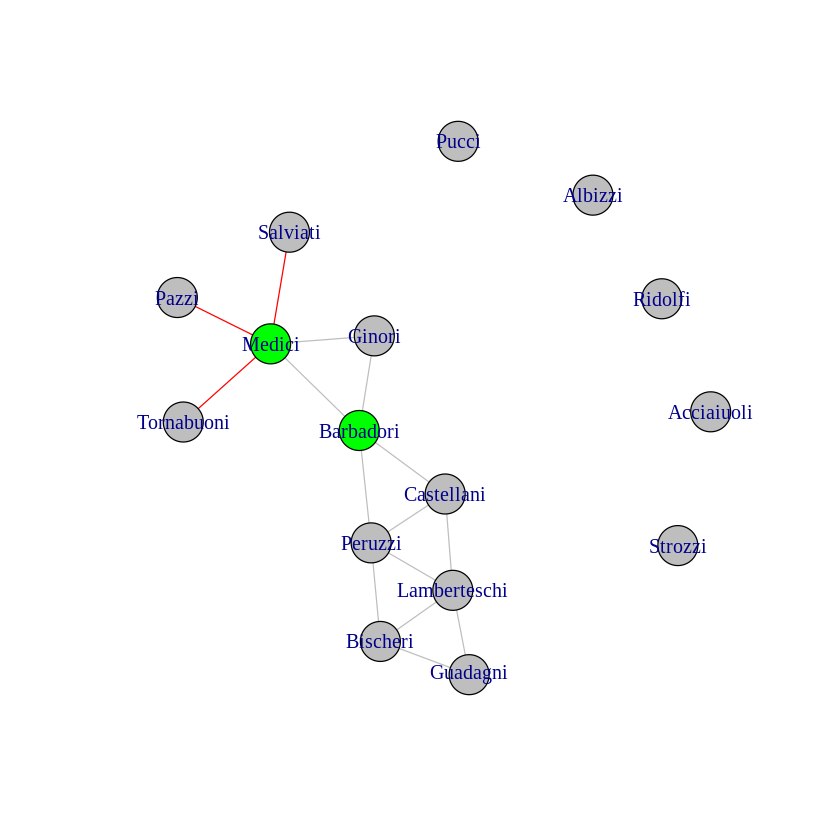

In [35]:
vertex_colors <- ifelse(V(net_florentine_business) %in% articulation_points,'green','gray')
edge_colors <- ifelse(E(net_florentine_business) %in% graph_bridges,'red','gray')

plot(net_florentine_business, edge.color = edge_colors, vertex.color = vertex_colors)

12. Выполнить пп. 2–8 для направленной сети из файла krackhardt_advice.csv
(для нечётных вариантов)

Извлем социоматрицу с помощью соответствующих функций. Выведем полученную социоматрицу на экран. Преобразум социоматрицу в список рёбер. Выведем первые 5 элементов списка рёбер. После присвоим имена столбцам и строкам социоматрицы.

In [36]:
df_krackhardt_advice <- read.csv('krackhardt_advice.csv', comment.char = '#', header=FALSE)
df_krackhardt_advice
sociomatrix_krackhardt_advice <- as.matrix(df_krackhardt_advice)

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,⋯,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
0,1,0,1,0,0,0,1,0,0,⋯,0,0,0,0,1,0,1,0,0,1
0,0,0,0,0,1,1,0,0,0,⋯,0,0,0,0,0,0,0,0,0,1
1,1,0,1,0,1,1,1,1,1,⋯,1,0,1,0,0,1,1,0,1,1
1,1,0,0,0,1,0,1,0,1,⋯,1,0,0,0,1,1,1,0,1,1
1,1,0,0,0,1,1,1,0,1,⋯,0,1,1,0,1,1,1,1,1,1
0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,1
0,1,0,0,0,1,0,0,0,0,⋯,1,0,1,0,0,1,1,0,0,1
0,1,0,1,0,1,1,0,0,1,⋯,0,0,0,0,0,0,1,0,0,1
1,1,0,0,0,1,1,1,0,1,⋯,1,0,1,0,1,1,1,0,0,1


In [37]:
edgeslist_krackhardt_advice <- as_edgelist(graph.adjacency(sociomatrix_krackhardt_advice, mode = "directed"))
colnames(edgeslist_krackhardt_advice) <- c('from', 'to')
head(edgeslist_krackhardt_advice, 5)

from,to
V1,V2
V1,V4
V1,V8
V1,V16
V1,V18


In [38]:
rownames(sociomatrix_krackhardt_advice) <- colnames(sociomatrix_krackhardt_advice)
sociomatrix_krackhardt_advice

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,⋯,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21
V1,0,1,0,1,0,0,0,1,0,0,⋯,0,0,0,0,1,0,1,0,0,1
V2,0,0,0,0,0,1,1,0,0,0,⋯,0,0,0,0,0,0,0,0,0,1
V3,1,1,0,1,0,1,1,1,1,1,⋯,1,0,1,0,0,1,1,0,1,1
V4,1,1,0,0,0,1,0,1,0,1,⋯,1,0,0,0,1,1,1,0,1,1
V5,1,1,0,0,0,1,1,1,0,1,⋯,0,1,1,0,1,1,1,1,1,1
V6,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,1
V7,0,1,0,0,0,1,0,0,0,0,⋯,1,0,1,0,0,1,1,0,0,1
V8,0,1,0,1,0,1,1,0,0,1,⋯,0,0,0,0,0,0,1,0,0,1
V9,1,1,0,0,0,1,1,1,0,1,⋯,1,0,1,0,1,1,1,0,0,1
V10,1,1,1,1,1,0,0,1,0,0,⋯,0,1,0,1,1,1,1,1,1,0


С помощью соответствующих функций по полученной социоматрице построим направленную сеть.

Параметры:
1. Социоматрица
2. Режим: направленая сеть

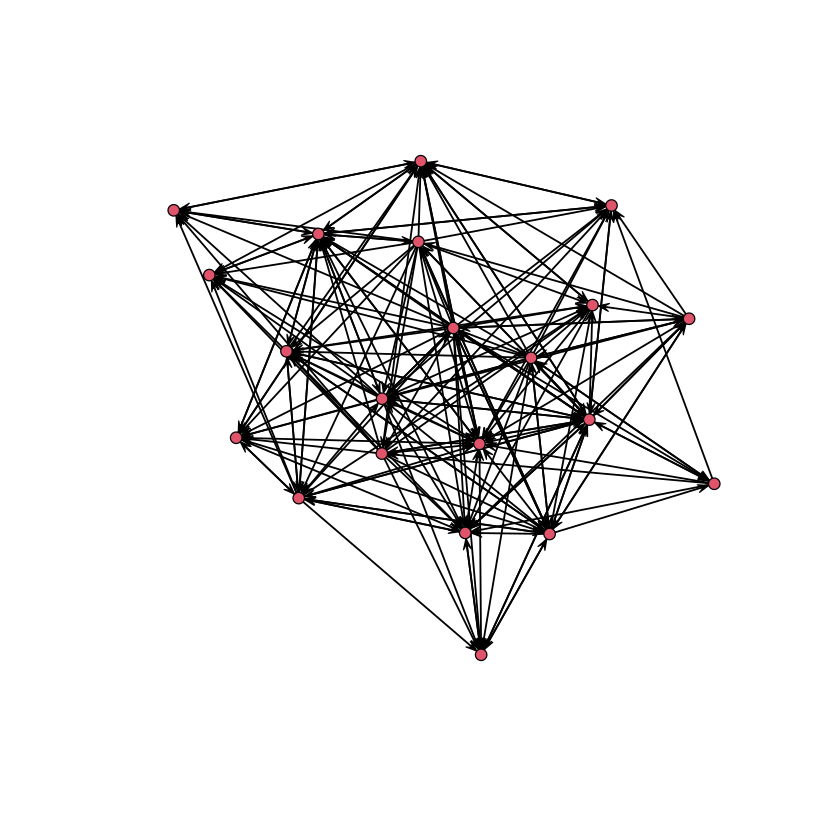

In [39]:
network_krackhardt_advice <- network(sociomatrix_krackhardt_advice, mode = "directed")
plot(network_krackhardt_advice)

Отобразим сеть с помощью алгоритмов укладки Фрюхтермана–
Рейнгольда и Камада–Каваи.

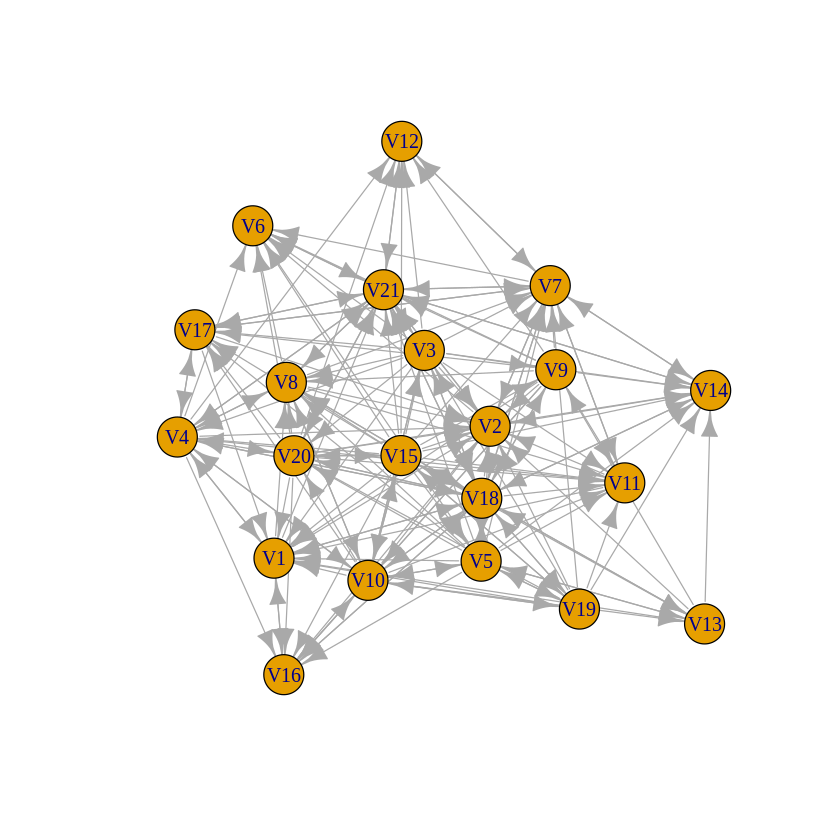

In [40]:
graph_krackhardt_advice <- graph_from_adjacency_matrix(sociomatrix_krackhardt_advice, mode='directed')
fr <- layout_with_fr(graph_krackhardt_advice)
plot(graph_krackhardt_advice, layout=fr)

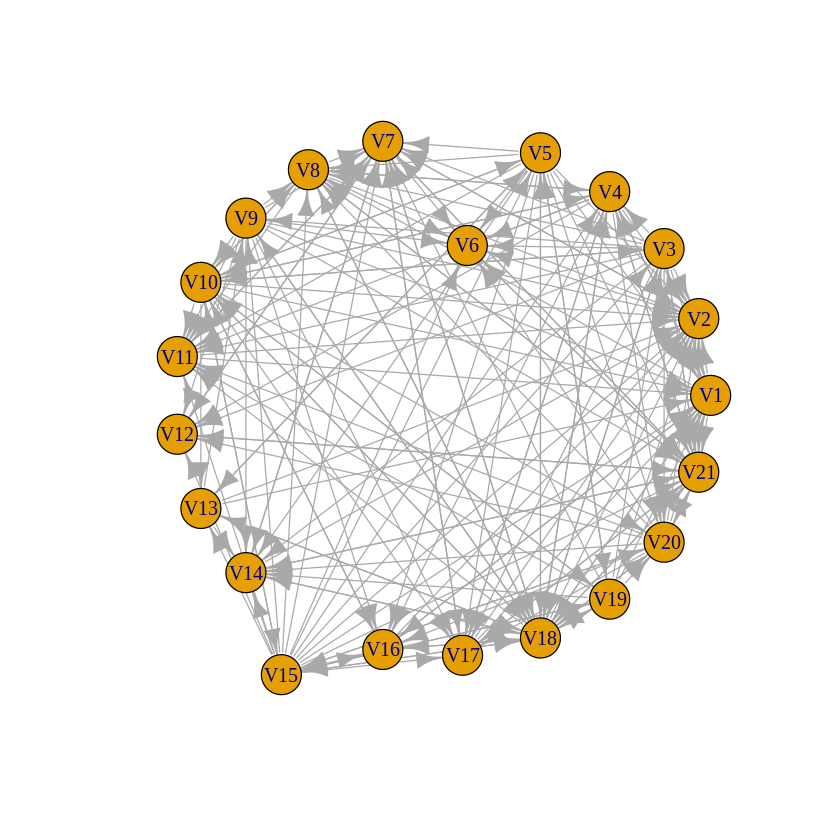

In [41]:
kk <- layout_with_kk(graph_krackhardt_advice)
plot(graph_krackhardt_advice, layout=kk)

Выведем «описательную сводку» сети

In [42]:
summary(network_krackhardt_advice)

Network attributes:
  vertices = 21
  directed = TRUE
  hyper = FALSE
  loops = FALSE
  multiple = FALSE
  bipartite = FALSE
 total edges = 190 
   missing edges = 0 
   non-missing edges = 190 
 density = 0.452381 

Vertex attributes:
  vertex.names:
   character valued attribute
   21 valid vertex names

No edge attributes

Network edgelist matrix:
       [,1] [,2]
  [1,]    3    1
  [2,]    4    1
  [3,]    5    1
  [4,]    9    1
  [5,]   10    1
  [6,]   11    1
  [7,]   13    1
  [8,]   15    1
  [9,]   16    1
 [10,]   17    1
 [11,]   18    1
 [12,]   19    1
 [13,]   20    1
 [14,]    1    2
 [15,]    3    2
 [16,]    4    2
 [17,]    5    2
 [18,]    7    2
 [19,]    8    2
 [20,]    9    2
 [21,]   10    2
 [22,]   11    2
 [23,]   13    2
 [24,]   14    2
 [25,]   15    2
 [26,]   16    2
 [27,]   17    2
 [28,]   18    2
 [29,]   19    2
 [30,]   20    2
 [31,]   21    2
 [32,]   10    3
 [33,]   15    3
 [34,]   18    3
 [35,]   19    3
 [36,]   21    3
 [37,]    1    4
 

Вычислим «пятичисловую сводку» сети:
  1. Вычислим размер сети.
  2. Вычислим плотность сети вручную и с помощью соответствующей функции.
  3. Определим число компонент в сети.
  4. Вычислим диаметр сети.
  5. Вычислим коэффициент кластеризации.


Размер сети:

In [43]:
network.size(network_krackhardt_advice)

[1] 21

Число компонент в сети:

In [44]:
count_components(graph_krackhardt_advice)

[1] 1

Плотность сети с помощью ф-ии.

In [45]:
network.density(network_krackhardt_advice)

[1] 0.452381

Плотность сети вручную:

In [46]:
ecount(graph_krackhardt_advice) / ( (factorial(vcount(graph_krackhardt_advice))) / factorial(vcount(graph_krackhardt_advice) - 2) )

[1] 0.452381

Как видим, значения совпдают.

Диаметр сети:

In [47]:
diameter(graph_krackhardt_advice)

[1] 3

Коэффициент кластеризации:

In [48]:
transitivity(graph_krackhardt_advice, type = "undirected")

[1] 0.7345088

Вывод:
1. Размер сети равен количесвту акторов в сети. В данном случае, размер сети равен 21.
2. Плотность сети, вычисленная вручную и с помощью функции совпадает. Т.е. доля имеющихся связей по отношению к макисмально возможному количеству связей равна 0.45.
3. Число компонент в сети равна 1.
4. Диаметр сети равен 3.
5. Коэффициент класстеризации (мера степени, в которой узлы графа стремятся сгруппироваться вместе) равен 0.73. 

Вычислим среднюю степень узлов и дисперсию.

In [49]:
cat('Среднее входящих:', mean(igraph::degree(graph_krackhardt_advice, mode = "in")))
cat('\nСреднее исходящих:', mean(igraph::degree(graph_krackhardt_advice, mode = "out")))

Среднее входящих: 9.047619
Среднее исходящих: 9.047619

In [50]:
cat('Дисперсия входящих:', var(igraph::degree(graph_krackhardt_advice, mode = "in")))
cat('\nДисперсия исходящих:', var(igraph::degree(graph_krackhardt_advice, mode = "out")))

Дисперсия входящих: 16.54762
Дисперсия исходящих: 29.74762

В среднем число входящих и исходящих ребер равны 9. А дисперсия входящих меньше числа исходящих.

13.
Заполнить таблицу для различных мер престижа:

<div align="center">

| $n_i$ 	| $P^{'}_{D}(n_i)$ 	| $P^{'}_{P}(n_i)$ |
|---	|---	|---	|
|  	|  	|  	|

</div>

In [51]:
prestige_proximity <- sna::prestige(network_krackhardt_advice, cmode='domain.proximity', gmode='digraph', rescale = TRUE)
prestige_proximity

[1] 0.05051556 0.06888485 0.04209630 0.04735834 0.03788667 0.05051556
 [7] 0.05612840 0.05051556 0.03696260 0.04329905 0.05051556 0.04457255
[13] 0.03696260 0.05051556 0.03696260 0.04329905 0.04888602 0.06061867
[19] 0.03696260 0.04592323 0.06061867

In [52]:
prestige_degree_norm <- sna::prestige(network_krackhardt_advice, cmode='indegree')/(network.size(network_krackhardt_advice)-1)
prestige_degree_norm

[1] 0.65 0.90 0.25 0.40 0.25 0.50 0.65 0.50 0.20 0.45 0.55 0.35 0.20 0.50 0.20
[16] 0.40 0.45 0.75 0.20 0.40 0.75

In [53]:
df_prestige <- data.frame(
    "n_i"=colnames(sociomatrix_krackhardt_advice),
    "degree_norm"=prestige_degree_norm,
    "proximity_norm"=prestige_proximity
)


df_prestige

n_i,degree_norm,proximity_norm
<chr>,<dbl>,<dbl>
V1,0.65,0.05051556
V2,0.90,0.06888485
V3,0.25,0.04209630
V4,0.40,0.04735834
V5,0.25,0.03788667
V6,0.50,0.05051556
V7,0.65,0.05612840
V8,0.50,0.05051556
V9,0.20,0.03696260


Наибольшим числом входящих связей является V2, что видно из значений престижа для данного актора.

## Выводы

В ходе данной работы были получены навыки работы с математическими пакетами для моделирования, визуализации и анализа социальных сетей. Для направленной и ненаправленной сети были рассчитаны размер, плотность, диаметр, число компонент связности, коэффициент кластеризации, средняя степень узлов и дисперсия степеней узлов. Для укладки сетей были рассмотрены алгоритмы Фрюхтермана–Рейнгольда и Камада–Каваи. Были обнаружены наиболее влиятельные акторы в сети по мерам центральности и престижа соответственно. Для направленной сети были вычислены значения престижа по степени и по близости.